In [ ]:
import numpy as np # Работа с алгеброй
import pandas as pd # Обработка данных

#Визуализация
import matplotlib.pyplot as plt

#ML
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os


<a class="anchor" id="2."></a>Olivetti Dataset

Описание:

* Все изображения взяты между 1992 и 1994 годами.
* 40 людей, 10 изображений каждого.
* Это результирует в 400 изображениях
* Изображения были сняты в разное время, с разным освещением и с разным поворотом головы
* На всех изображениях черный задник
* Изображения нормализованны по высоте
* Размер изображения 64x64
* Значения пикселей изображений нормированны в [0, 1] 
* Каждому человеку был присвоен номер от 0 до 39


In [ ]:
data = np.load("./hw olivetti/input/olivetti_faces.npy")
target = np.load("./hw olivetti/input/olivetti_faces_target.npy")

In [ ]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [ ]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

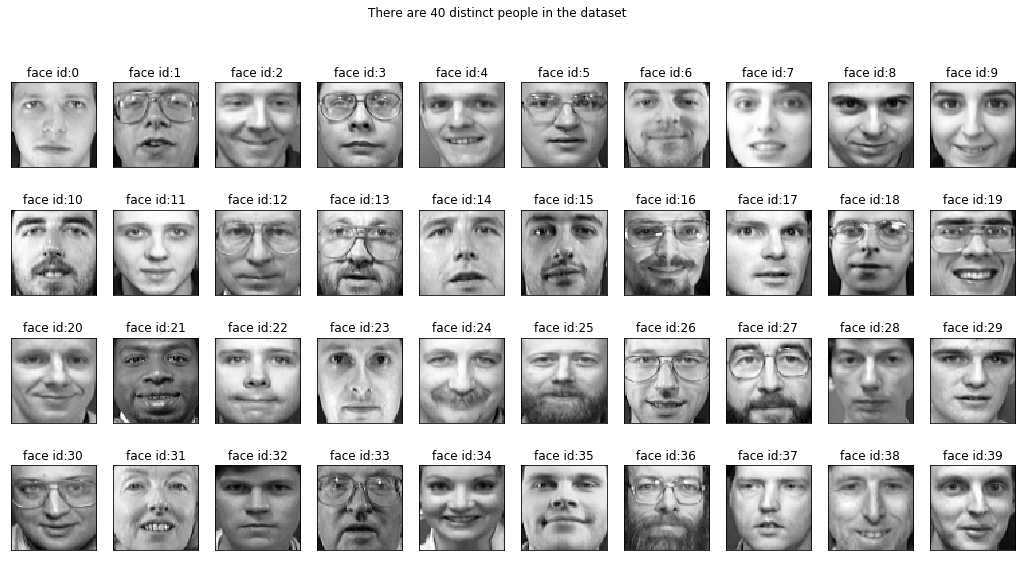

In [ ]:
show_40_distinct_people(data, np.unique(target))

In [ ]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

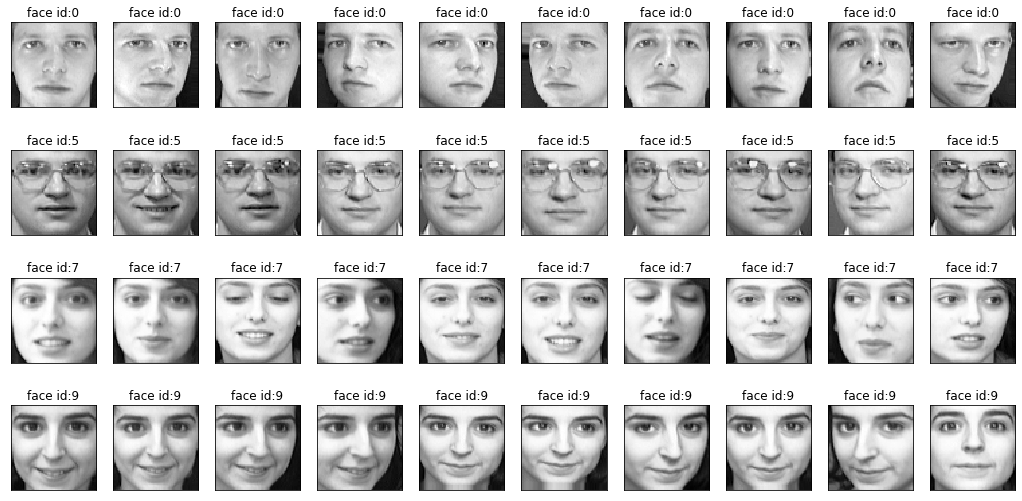

In [ ]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 7, 9])

In [ ]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


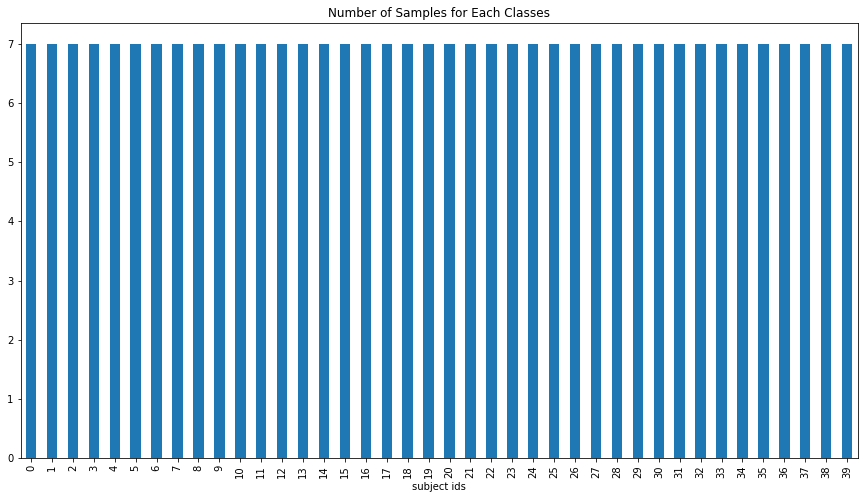

In [ ]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

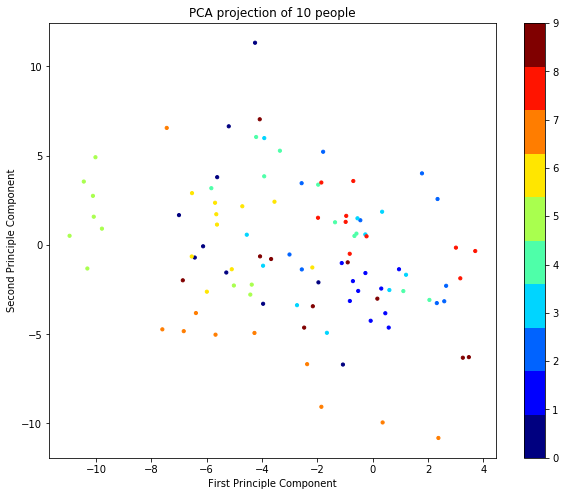

In [ ]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

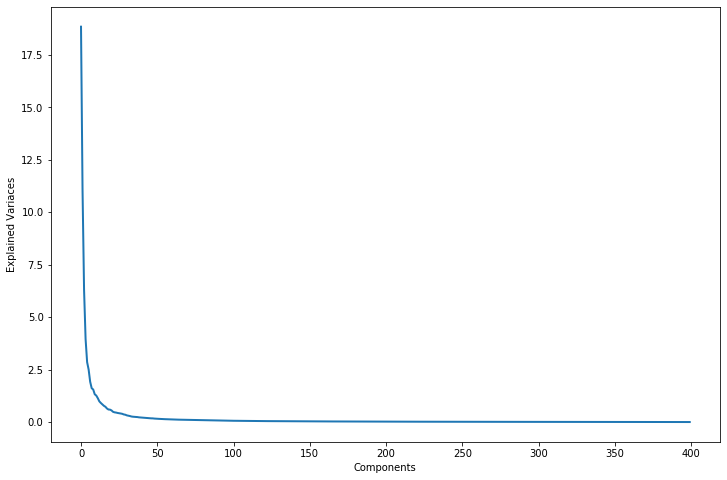

In [ ]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

По графику сверху, мы можем увидеть что увеличение количества компонент выше 90 не дает нам значимого улучшения

In [ ]:
n_components=90

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

Text(0.5, 1.0, 'Average Face')

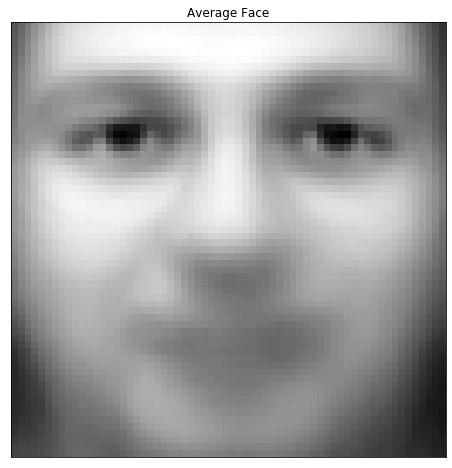

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

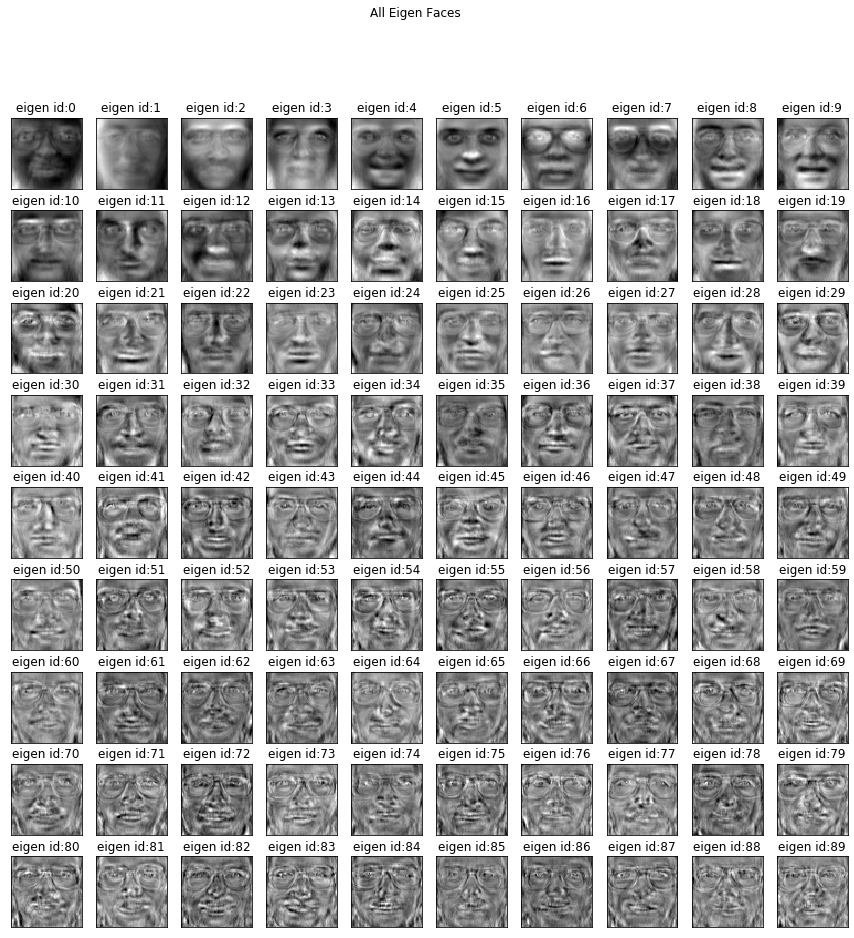

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.92


Сначала попробуем взять классификаторы из классического ML, такие как логиситическая регрессия, К-ближайших соседей и Случайный лес

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
r_forrest = RandomForestClassifier()

In [ ]:
r_forrest_params = {'n_estimators':range(10,200,10),
                    'max_depth':range(1,14,2),
                    'min_samples_leaf':range(1,8),
                    'min_samples_split':range(2,10,2)
                    }

In [ ]:
log_reg_params = {'max_iter':range(50,501,50)}

In [ ]:
knn_params = {'algorithm':['ball_tree','kd_tree','brute'],
              'leaf_size': range(2,91,30),
             }

In [ ]:
grid_knn = GridSearchCV(knn,knn_params,cv=5)
grid_log_reg = GridSearchCV(log_reg,log_reg_params,cv=5)
grid_forest = GridSearchCV(r_forrest,r_forrest_params,cv=5)

In [ ]:
grid_knn = GridSearchCV(knn,knn_params,cv=5)


In [ ]:
grid_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(2, 91, 30)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_log_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': range(50, 501, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_forest.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
y_pred_rf = grid_forest.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_rf)))

accuracy score:0.89


In [ ]:
y_pred_lr = grid_log_reg.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_lr)))

accuracy score:0.93


In [ ]:
y_pred = grid_knn.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.71


Как видим, лучшая точность у логистической регрессии, попробуем написать простую нейронную сеть.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_shape=(90,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(40, activation = 'softmax')
])



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_pca, y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 4ms/step - loss: 4.5033 - accuracy: 0.0179
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 3.4010 - accuracy: 0.1250
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 2.7120 - accuracy: 0.2643
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 2.1313 - accuracy: 0.3964
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 1.6612 - accuracy: 0.5643
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 1.3122 - accuracy: 0.7000
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0948 - accuracy: 0.7643
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9241 - accuracy: 0.8036
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8276 - accuracy: 0.8036
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6142 - accuracy: 0.8750
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9964
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9964
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 89/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9964
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0144 - accuracy: 0.9964
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 94/100
9/9 [===============

In [ ]:
model.evaluate(X_test_pca,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.9500


[0.40574339032173157, 0.949999988079071]

Точность с нейронной сетью составила 95 процентов, наивысшее значение, которое удалось получить